# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

651

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build base url
base_url = 'http://api.openweathermap.org/data/2.5/weather?&units=imperial'
# query url
query_url = f'{base_url}&appid={weather_api_key}&q='

# Counters
set_counter = 1

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
weather_date = []

print ('Beginning Data Retrieval')
print ('------------------------------------')

# Creating a loop to make api calls for each city in our list
for i, city in enumerate (cities):
    
    response = requests.get(query_url+city).json()
    print (f'Processing Record {i} | {city}')
    
    # Try to get the data from API, if no data or city is available, skip that city and continue
    try:
        # retrieve and append lists with data
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        weather_date.append((datetime.fromtimestamp(response['dt'])).strftime('%m/%d/%y'))
        
        set_counter += 1
        
    # Handle all exceptions for a city that is not available in the Weather API by passing over it
    except:
        print ('City not found. Skipping...')
        pass

Beginning Data Retrieval
------------------------------------
Processing Record 0 | norman wells
Processing Record 1 | rikitea
Processing Record 2 | mataura
Processing Record 3 | umm kaddadah
Processing Record 4 | upernavik
Processing Record 5 | husavik
Processing Record 6 | camocim
Processing Record 7 | lompoc
Processing Record 8 | altamira
Processing Record 9 | cetraro
Processing Record 10 | mahebourg
Processing Record 11 | arnedo
Processing Record 12 | san quintin
Processing Record 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 | cape town
Processing Record 15 | bargal
City not found. Skipping...
Processing Record 16 | jamestown
Processing Record 17 | puerto ayora
Processing Record 18 | ribeira grande
Processing Record 19 | kapaa
Processing Record 20 | north bend
Processing Record 21 | inuvik
Processing Record 22 | pevek
Processing Record 23 | vaini
Processing Record 24 | oktyabrskoye
Processing Record 25 | namatanai
Processing Record 26 | hambantota
Processi

Processing Record 231 | chauk
Processing Record 232 | antofagasta
Processing Record 233 | mitu
Processing Record 234 | hay river
Processing Record 235 | san carlos de bariloche
Processing Record 236 | quixada
Processing Record 237 | kathu
Processing Record 238 | hobart
Processing Record 239 | tunduru
City not found. Skipping...
Processing Record 240 | nikolskoye
Processing Record 241 | rio grande
Processing Record 242 | taburbah
City not found. Skipping...
Processing Record 243 | bathsheba
Processing Record 244 | ust-nera
Processing Record 245 | sao gabriel da cachoeira
Processing Record 246 | atar
Processing Record 247 | araouane
Processing Record 248 | chishtian mandi
Processing Record 249 | gola gokarannath
Processing Record 250 | faanui
Processing Record 251 | aklavik
Processing Record 252 | ixtapa
Processing Record 253 | stoyba
City not found. Skipping...
Processing Record 254 | tomatlan
Processing Record 255 | sorland
Processing Record 256 | sorvag
City not found. Skipping...
Pro

Processing Record 463 | sambek
Processing Record 464 | nanning
Processing Record 465 | ligayan
Processing Record 466 | tungkang
City not found. Skipping...
Processing Record 467 | ilulissat
Processing Record 468 | highland
Processing Record 469 | ambulu
Processing Record 470 | pangai
Processing Record 471 | bambanglipuro
Processing Record 472 | ahuimanu
Processing Record 473 | baculin
Processing Record 474 | lexington
Processing Record 475 | coquimbo
Processing Record 476 | yangliuqing
Processing Record 477 | kavaratti
Processing Record 478 | sao miguel do araguaia
Processing Record 479 | tabarqah
City not found. Skipping...
Processing Record 480 | vardo
Processing Record 481 | wairoa
Processing Record 482 | baykit
Processing Record 483 | paamiut
Processing Record 484 | dawei
Processing Record 485 | plaster rock
Processing Record 486 | lagoa
Processing Record 487 | tuatapere
Processing Record 488 | gull lake
Processing Record 489 | cam ranh
Processing Record 490 | coromandel
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Creating a data frame with the weather data from API call
weather_data_df = pd.DataFrame({'City': city_name,
                              'Country': country,
                               'Latitude': lat,
                               'Longitude': lng,
                               'Max Temp': max_temp,
                               'Humidity': humidity,
                               'Cloudiness': cloudiness,
                               'Wind Speed': wind_speed,
                               'Date': weather_date})

# Export file as a CSV, without the Pandas index, but with the header
weather_data_df.to_csv("Output/Weather_Data.csv", index=False, header=True)

weather_data_df.count()

City          596
Country       596
Latitude      596
Longitude     596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Date          596
dtype: int64

In [5]:
weather_data_df

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Norman Wells,CA,65.28,-126.83,57.20,93,75,3.36,07/16/20
1,Rikitea,PF,-23.12,-134.97,73.60,87,100,2.82,07/16/20
2,Mataura,NZ,-46.19,168.86,34.50,94,7,2.39,07/16/20
3,Umm Kaddadah,SD,13.60,26.69,84.27,50,99,13.49,07/16/20
4,Upernavik,GL,72.79,-56.15,42.80,86,95,1.36,07/16/20
...,...,...,...,...,...,...,...,...,...
591,Birin,NP,26.89,88.07,72.10,96,87,3.42,07/16/20
592,Grand Gaube,MU,-20.01,57.66,75.20,64,40,11.41,07/16/20
593,Macapá,BR,0.04,-51.07,78.80,100,40,11.41,07/16/20
594,Selenduma,RU,50.91,106.24,61.81,60,100,6.93,07/16/20


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Checking what the max humidity is
weather_data_df['Humidity'].max()

# Since no cities have humidity > 100, weather_data is a clean data set and this section is not needed

100

In [7]:
#  Get the indices of cities that have humidity over 100%.

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [9]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

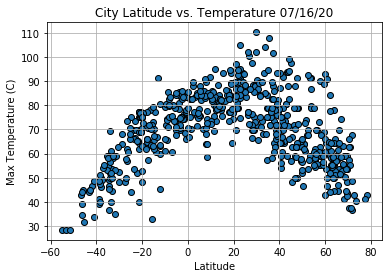

In [10]:
# Create scatter plot of weight and mean tumor volume with configuration
weather_date = weather_data_df['Date'][0]

plt.scatter(
    weather_data_df['Latitude'], 
    weather_data_df['Max Temp'],
    marker="o",  
    edgecolors="black")

plt.title(f'City Latitude vs. Temperature {weather_date}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

plt.savefig('Figures/Latitude Vs Temperature.png')
plt.show()

In this analysis of latitude of a city compared to its temperature we see that the closer the city is to the equater (latitude = 0), the higher the max temperature will be. 
What is interesting to note, is that at a latitude of 30<sup>o</sup>, the temperature is the highest. This could be due to the angle at which Earth orbits the Sun.

## Latitude vs. Humidity Plot

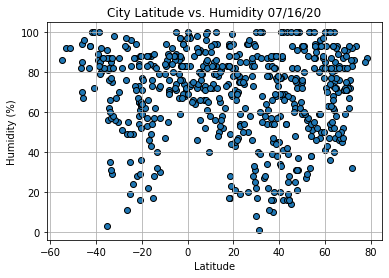

In [11]:
# Create scatter plot of weight and mean tumor volume with configuration
plt.scatter(
    weather_data_df['Latitude'], 
    weather_data_df['Humidity'],
    marker="o",  
    edgecolors="black")

plt.title(f'City Latitude vs. Humidity {weather_date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

plt.savefig('Figures/Latitude Vs Humidity.png')
plt.show()

There does not seem to be a strong correlation between the latitude of a city and its humidity. It does appear that at a latitude of -30<sup>o</sup> and 35<sup>o</sup> the humidity is at its lowest at approximately 5% and 0% respectivel. And for cities at any other latitude, there is a sharp increase in humidity. The majority of cities are at 60% humidity or above.

## Latitude vs. Cloudiness Plot

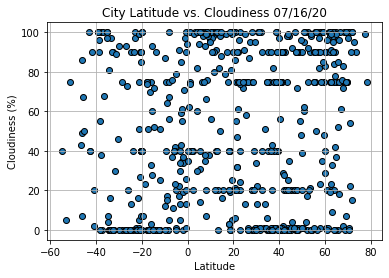

In [12]:
# Create scatter plot of weight and mean tumor volume with configuration
plt.scatter(
    weather_data_df['Latitude'], 
    weather_data_df['Cloudiness'],
    marker="o",  
    edgecolors="black")

plt.title(f'City Latitude vs. Cloudiness {weather_date}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

plt.savefig('Figures/Latitude Vs Cloudiness.png')
plt.show()

There does not seem to be any correlation between the cloudiness of a city and its latitude.

## Latitude vs. Wind Speed Plot

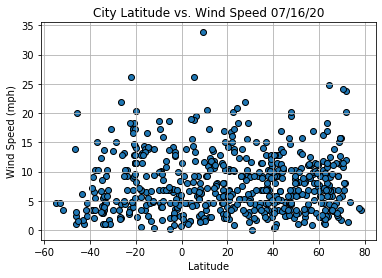

In [13]:
# Create scatter plot of weight and mean tumor volume with configuration
plt.scatter(
    weather_data_df['Latitude'], 
    weather_data_df['Wind Speed'],
    marker='o',  
    edgecolors='black')

plt.title(f'City Latitude vs. Wind Speed {weather_date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

plt.savefig('Figures/Latitude Vs Wind Speed.png')
plt.show()

The correlation between a city's wind speed and its latitude seems to be very week or none at all. As at July 15, 2020 the averge wind speed appears to be between 1 mph and 5 mph.

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

def line_regress_plot(x_values, y_values,x_label, y_label, hem, x_ann, y_ann):
    '''Creates a linear regression plot'''
    '''Parameters: x_values = x-axis values, 
                   y_values = x-axis values,
                   x_label, y_label = Axis lables,
                   hem = hemisphere (Northern, Southern)
                   x_ann, y_ann = regression line location'''
    
    # Define date of Weather
    weather_date = weather_data_df['Date'][0]
    #Define file name
    file_name = f'{hem}_Hem {x_label} vs. {y_label}.png'
        
    # Calculate and add linear regression equation to the scatter plot
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    line_eqn = f'Y = {str(round(slope,2))}x + {str(round(intercept,2))}'

    plt.scatter(x_values,y_values, edgecolor='black', facecolor='blue', alpha=0.5)
    plt.plot(x_values,regress_values,'r-')
    plt.annotate(line_eqn,(x_ann,y_ann),fontsize=15,color='red')
    plt.title(f'{hem} Hemisphere\nCity {x_label} vs. {y_label} {weather_date}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    print(f'The r-squared is: {rvalue**2}')
    print(f'The regression line equation is: {line_eqn}')
    
    plt.savefig(f'Figures/{file_name}')
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem = weather_data_df.loc[weather_data_df['Latitude'] > 0]
southern_hem = weather_data_df.loc[weather_data_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4078094504736565
The regression line equation is: Y = -0.45x + 89.62


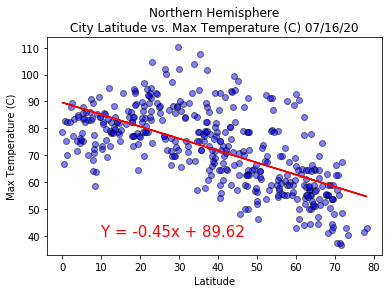

In [24]:
line_regress_plot(northern_hem['Latitude'], northern_hem['Max Temp'],'Latitude', 'Max Temperature (C)', 'Northern', 10,40)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6370801275443256
The regression line equation is: Y = 0.85x + 81.66


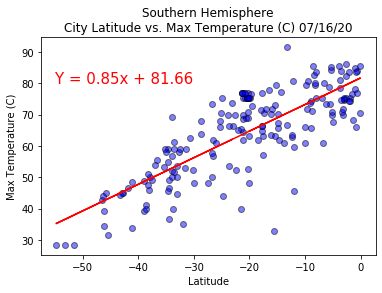

In [25]:
line_regress_plot(southern_hem['Latitude'], southern_hem['Max Temp'],'Latitude', 'Max Temperature (C)', 'Southern', -55, 80)

The linear regression for the northern hemisphere's cities max temperature compared to their latitude is showing that the closer one moves towards the equator (latitude = 0), the higher the max temperature will be.  This is a weak (0.3 <= r <=0.5) negative correlation. 

The linear regression for the southern hemispheres cities max temperatures compared to their ladtitudes however, produces a strong positive correlation (0.5 <= r <= 0.7) for when the latitude approaches the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0002775046054017253
The regression line equation is: Y = -0.02x + 68.79


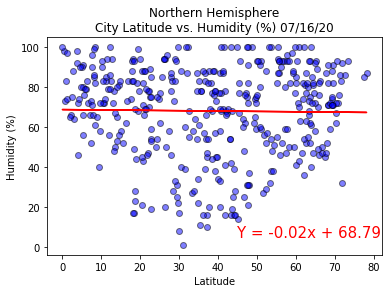

In [27]:
line_regress_plot(northern_hem['Latitude'], northern_hem['Humidity'],'Latitude', 'Humidity (%)', 'Northern', 45, 5)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00016721339411954178
The regression line equation is: Y = -0.02x + 71.46


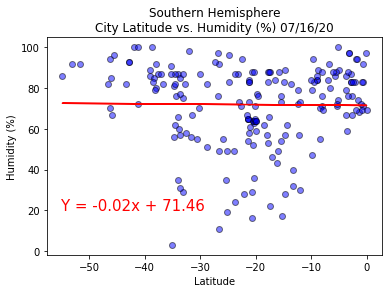

In [19]:
line_regress_plot(southern_hem['Latitude'], southern_hem['Humidity'],'Latitude', 'Humidity (%)', 'Southern', -55, 20)

As expected, the linear regression for both the northern and southern hemispheres for humidity campared to the latitude are not correlated or have a very weak correlation (r < 0.3). Based on this, we can say that the latitue of a city does not have an effect on its humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0003598256940918299
The regression line equation is: Y = -0.04x + 56.97


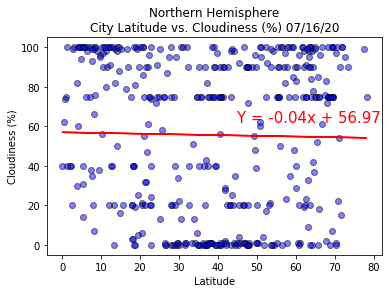

In [28]:
line_regress_plot(northern_hem['Latitude'], northern_hem['Cloudiness'],'Latitude', 'Cloudiness (%)', 'Northern', 45, 62)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0031515262877208753
The regression line equation is: Y = -0.16x + 36.3


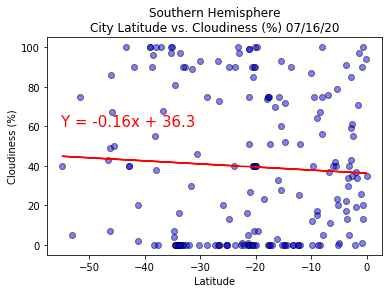

In [29]:
line_regress_plot(southern_hem['Latitude'], southern_hem['Cloudiness'],'Latitude', 'Cloudiness (%)', 'Southern', -55, 60)

While the linear regression for the northern hemispheres cloudiness campared to the temperature is not correlated or has a very weak correlation (r < 0.3), (r = 0.00000283), the correlation for the southern hemispheres data is slightly stronger, even though it is still a weak correlation (r = 0.0156). Based on this, we can say that the latitue of a city does not have an effect on its humidity.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0001535333276739742
The regression line equation is: Y = -0.0x + 8.12


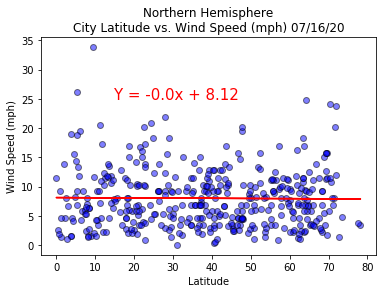

In [30]:
line_regress_plot(northern_hem['Latitude'], northern_hem['Wind Speed'],'Latitude', 'Wind Speed (mph)', 'Northern', 15, 25)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008765778610067495
The regression line equation is: Y = 0.04x + 8.53


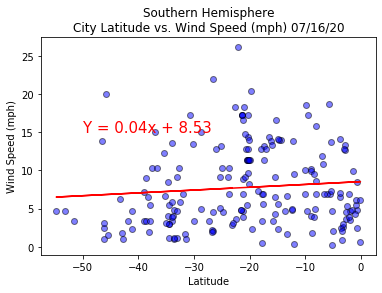

In [31]:
line_regress_plot(southern_hem['Latitude'], southern_hem['Wind Speed'],'Latitude', 'Wind Speed (mph)', 'Southern', -50, 15)

The linear regression for both the northern and southern hemispheres for wind speed campared to the latitude are not correlated or have a very weak correlation (r < 0.3). Based on this, we can say that the latitue of a city does not have an effect on its wind speed.